In [1]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

# Load Pretrained Sentiment Model
classifier = pipeline("text-classification", model="bhadresh-savani/distilbert-base-uncased-emotion")

# Load Hinglish Dataset
df = pd.read_csv(r"C:\Users\lenovo\Desktop\hinglish sentiment\datasets\bollywood_dialogues.csv")  # Update with your actual file path

# Ensure it has 'English Translation' column
if "English Translation" not in df.columns:
    raise ValueError("Dataset must contain 'English Translation' column")

# Apply Sentiment Model to English Translations
tqdm.pandas()
df["Sentiment"] = df["English Translation"].progress_apply(lambda text: classifier(text)[0]["label"])

# Save Labeled Dataset for Fine-Tuning
df.to_csv("hinglish_labeled_dataset.csv", index=False)

print("✅ Dataset labeled and saved successfully!")

c:\Users\lenovo\Desktop\hinglish sentiment\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu
100%|██████████| 25132/25132 [12:45<00:00, 32.82it/s]


✅ Dataset labeled and saved successfully!


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6616\3099656241.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


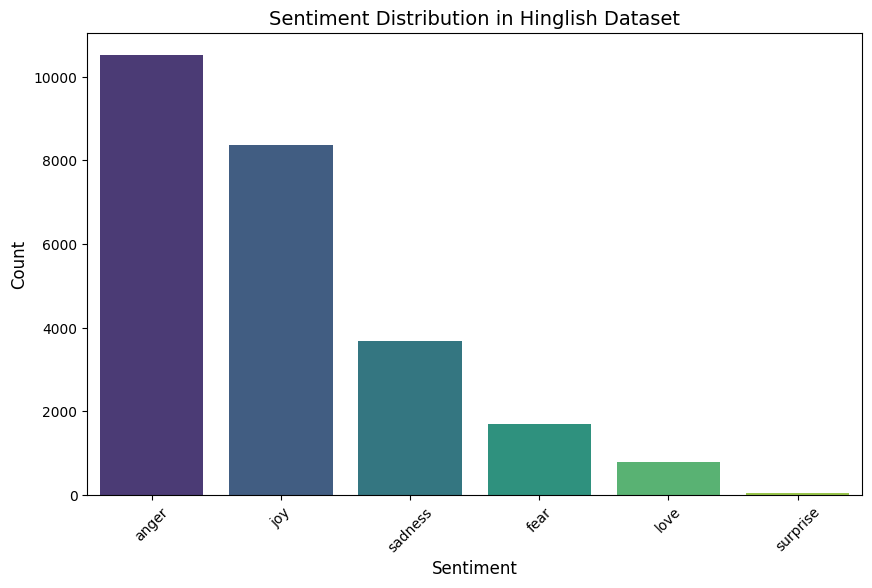

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Labeled Dataset
df = pd.read_csv("hinglish_labeled_dataset.csv")  # Update with your actual file path

# Check Sentiment Distribution
sentiment_counts = df["Sentiment"].value_counts()

# Plot Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Add Labels and Title
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Sentiment Distribution in Hinglish Dataset", fontsize=14)
plt.xticks(rotation=45)
plt.show()
